# Ungraded Lab Part 1 - Deploying a Machine Learning Model

Welcome to this ungraded lab! If you are reading this it means you did the setup properly, nice work!

This lab is all about deploying a real machine learning model, and checking what doing so feels like. More concretely, you will deploy a computer vision model trained to detect common objects in pictures. Deploying a model is one of the last steps in a prototypical machine learning lifecycle. However, we thought it would be exciting to get you to deploy a model right away. This lab uses a pretrained model called [`YOLOV3`](https://pjreddie.com/darknet/yolo/). This model is very convenient for two reasons: it runs really fast, and for object detection it yields accurate results.

The sequence of steps/tasks to complete in this lab are as follow:
1. Inspect the image data set used for object detection
2. Take a look at the model itself
3. Deploy the model using [`fastAPI`](https://fastapi.tiangolo.com/)

## Object Detection with YOLOV3

### Inspecting the images

Let's take a look at the images that will be passed to the YOLOV3 model. This will bring insight on what type of common objects are present for detection. These images are part of the [`ImageNet`](http://www.image-net.org/index) dataset.

In [11]:
from IPython.display import Image, display


Displaying image: oranges.jpg


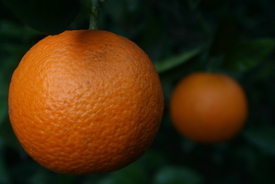

In [12]:
# Some example images
image_files = [
    'oranges.jpg'
]

for image_file in image_files:
    print(f"\nDisplaying image: {image_file}")
    display(Image(filename=f"/src/app/files/yolov/inputs_yolov/{image_file}"))

### Overview of the model

Now that you have a sense of the image data and the objects present, let's try and see if the model is able to detect and classify them correctly.

For this you will be using [`cvlib`](https://www.cvlib.net/), which is a very simple but powerful library for object detection that is fueled by [`OpenCV`](https://docs.opencv.org/4.5.1/) and [`Tensorflow`](https://www.tensorflow.org/).

More concretely, you will use the [`detect_common_objects`](https://docs.cvlib.net/object_detection/) function, which takes an image formatted as a [`numpy array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) and returns:

- `bbox`: list of list containing bounding box coordinates for detected objects. 

        Example:
    
    ```python
        [[32, 76, 128, 192], [130, 83, 220, 185]]
    ```
    

- `label`: list of labels for detected objects.
    
        Example:
    ```python
        ['apple', 'apple']
    ```


- `conf`: list of confidence scores for detected objects.
        Example:
        
    ```python
        [0.6187325716018677, 0.42835739254951477]
    ```
    
In the next section you will visually see these elements in action.

### Creating the detect_and_draw_box function

Before using the object detection model, create a directory where you can store the resulting images:


In [17]:
# import os

# dir_name = "images_with_boxes"
# if not os.path.exists(dir_name):
#     os.mkdir(dir_name)

Let's define the `detect_and_draw_box` function which takes as input arguments: the **filename** of a file on your system, a **model**, and a **confidence level**. With these inputs, it detects common objects in the image and saves a new image displaying the bounding boxes alongside the detected object.

You might ask yourself why does this function receive the model as an input argument? What models are there to choose from? The answer is that `detect_common_objects` uses the `yolov3` model by default.  However, there is another option available that is much tinier and requires less computational power. 

It is the `yolov3-tiny` version. As the model name indicates, this model is designed for constrained environments that cannot store big models. With this comes a natural tradeoff: the results are less accurate than the full model. However, it still works pretty well. Going forward, we recommend you stick to it since it is a lot smaller than the regular `yolov3` and downloading its pretrained weights takes less time.

The model output is a vector of probabilities for the presence of different objects on the image. The last input argument, confidence level, determines the threshold that the probability needs to surpass to report that a given object is detected on the supplied image. By default, `detect_common_objects` uses a value of 0.5 for this.

In [20]:
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox


def detect_and_draw_box(filename, model="yolov3-tiny", confidence=0.5):
    """Detects common objects on an image and creates a new image with bounding boxes.

    Args:
        filename (str): Filename of the image.
        model (str): Either "yolov3" or "yolov3-tiny". Defaults to "yolov3-tiny".
        confidence (float, optional): Desired confidence level. Defaults to 0.5.
    """
    
    # Images are stored under the images/ directory
    img_filepath = f'/src/app/files/yolov/inputs_yolov//{filename}'
    
    # Read the image into a numpy array
    img = cv2.imread(img_filepath)
    
    # Perform the object detection
    bbox, label, conf = cv.detect_common_objects(img, confidence=confidence, model=model)
    
    # Print current image's filename
    print(f"========================\nImage processed: {filename}\n")
    
    # Print detected objects with confidence level
    for l, c in zip(label, conf):
        print(f"Detected object: {l} with confidence level of {c}\n")
    
    # Create a new image that includes the bounding boxes
    output_image = draw_bbox(img, bbox, label, conf)
    
    # Save the image in the directory images_with_boxes
    cv2.imwrite(f'/src/app/files/yolov/outputs_yolov/{filename}', output_image)
    
    # Display the image with bounding boxes
    display(Image(f'/src/app/files/yolov/outputs_yolov/{filename}'))

Let's try it out for the example images.

Image processed: oranges.jpg

Detected object: orange with confidence level of 0.6185590624809265

Detected object: orange with confidence level of 0.5561691522598267



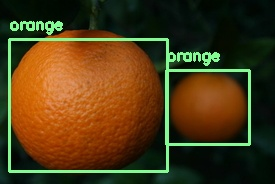

In [21]:
for image_file in image_files:
    detect_and_draw_box(image_file)